# Comparison Based Analysis on Stock Forecasting Dataset using Linear Regression and L1 Regression

# Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data

In [23]:
df = pd.read_csv('UBER.csv')

In [24]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,10-05-2019,45.000000,41.060001,42.000000,41.570000,186322500,41.570000
1,13-05-2019,39.240002,36.080002,38.790001,37.099998,79442400,37.099998
2,14-05-2019,39.959999,36.849998,38.310001,39.959999,46661100,39.959999
3,15-05-2019,41.880001,38.950001,39.369999,41.290001,36086100,41.290001
4,16-05-2019,44.060001,41.250000,41.480000,43.000000,38115500,43.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       389 non-null    object 
 1   High       389 non-null    float64
 2   Low        389 non-null    float64
 3   Open       389 non-null    float64
 4   Close      389 non-null    float64
 5   Volume     389 non-null    int64  
 6   Adj Close  389 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 21.4+ KB


In [26]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,389.000000,389.000000,389.000000,389.000000,3.890000e+02,389.000000
mean,35.098609,33.603892,34.391476,34.375758,2.461581e+07,34.375758
std,5.801914,5.831753,5.807690,5.781304,1.963118e+07,5.781304
min,17.799999,13.710000,15.960000,14.820000,3.380000e+06,14.820000
25%,31.049999,29.850000,30.469999,30.450001,1.193540e+07,30.450001
50%,34.180000,32.680000,33.500000,33.410000,2.021700e+07,33.410000
75%,38.000000,36.799999,37.560001,37.209999,3.156990e+07,37.209999
max,50.750000,48.650002,49.980000,49.259998,1.863225e+08,49.259998


In [27]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

# Linear Regression

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
print(regressor.coef_)

[ 7.80367914e-01  7.55745149e-01 -5.47794050e-01 -1.68430010e-09]


In [32]:
print(regressor.intercept_)

0.46973103071069033


In [33]:
predicted = regressor.predict(x_test)

In [34]:
print(predicted)

[32.63531678 36.44405098 27.2353298  42.15377181 25.63780897 33.54313584
 31.3339934  31.25471891 33.28628241 30.46361005 32.9827135  43.24053493
 36.46356481 32.45568452 40.20431354 26.30516531 34.97885579 33.0991522
 30.25676184 30.42174516 34.27831757 27.44025414 32.3917228  31.89361836
 34.95424161 27.94267617 30.91474206 34.35977636 29.72952234 42.4110013
 33.78357517 33.94975682 31.01498582 27.76444053 49.22840456 27.50556055
 35.22504512 40.66244053 37.27455832 34.37531073 29.23819234 33.37837636
 31.50139749 30.60563704 33.02526775 44.68838123 41.39261169 32.17020124
 27.26532627 29.68125401 27.53312958 34.43460902 32.555765   31.16668069
 36.69946064 40.90679338 31.28368847 44.95759639 26.80472914 32.08741604
 28.24010196 27.41469037 20.54065981 29.70916656 34.3212797  43.96817761
 33.25803624 31.19405777 28.94085257 32.89451865 43.82526089 32.17702909
 39.83826129 32.44902777 34.82423126 30.73916987 36.52486205 40.55941305]


In [35]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [36]:
df2.head(25)

,Actual,Predicted
0,33.000000,32.635317
1,37.009998,36.444051
2,27.010000,27.235330
3,42.970001,42.153772
4,25.990000,25.637809
5,33.630001,33.543136
6,31.370001,31.333993
7,30.990000,31.254719
8,33.750000,33.286282
9,30.670000,30.463610


In [37]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.3337143608910061
Mean Squared Error: 0.19783448106055498
Root Mean Squared Error: 0.44478588226308957


# Data Visualisation of Linear Regression

In [38]:
graph = df2.head(20)

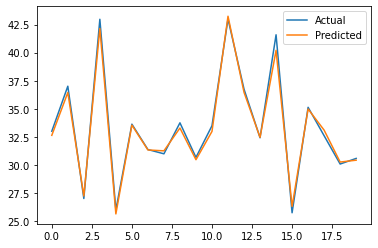

In [39]:
graph.plot(kind='line')

# Accuracy of Linear Regression

In [40]:
accuracy=regressor.score(x_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.2f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 99.29 %


# L1 Regression

In [41]:
lasso = Lasso()

In [43]:
lasso.fit(x_train,y_train)

Lasso()

In [44]:
print(lasso.coef_)

[ 5.16185595e-01  4.46105583e-01  0.00000000e+00 -1.66478946e-09]


In [45]:
print(lasso.intercept_)

1.3128775940032966


In [47]:
predicte=lasso.predict(x_test)

In [48]:
print(predicte)

[32.64513085 36.61149683 27.50206802 41.86141825 25.39771072 33.58089125
 31.31410522 31.3251379  33.06653319 30.56582386 33.38255427 42.39441666
 36.40590947 32.48304131 40.38217029 27.13789276 34.93725935 33.45376114
 30.10691367 30.39479597 33.91411266 27.67500145 32.74777764 31.65576021
 34.53340275 28.15987349 31.04679515 34.28796572 29.4591683  42.03565858
 33.91556314 34.24493998 30.84840666 28.27788073 48.62702634 27.42498204
 35.55080892 40.56490529 37.75236969 34.3676547  29.19090438 33.81079974
 32.01384102 30.77387172 33.46585029 43.79377012 41.1957069  32.19153319
 27.19551306 29.96357414 27.57471053 34.62169578 33.12829805 31.16183068
 36.73090736 40.97902689 31.40593322 44.65461455 26.72714082 31.76175796
 28.42527329 27.42154126 20.8315729  29.63807088 34.43210034 43.85412582
 33.35585507 31.37232183 29.29971633 32.73618496 43.28208085 32.54797909
 39.73358618 32.69629483 34.56898937 30.56985725 36.92615368 40.37708175]


In [49]:
df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predict' : predicte.flatten()})

In [50]:
df3.head(25)

,Actual,Predict
0,33.000000,32.645131
1,37.009998,36.611497
2,27.010000,27.502068
3,42.970001,41.861418
4,25.990000,25.397711
5,33.630001,33.580891
6,31.370001,31.314105
7,30.990000,31.325138
8,33.750000,33.066533
9,30.670000,30.565824


In [51]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicte))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicte))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicte)))

Mean Absolute Error: 0.39490608021217116
Mean Squared Error: 0.2710777665439936
Root Mean Squared Error: 0.5206512907349732


# Data Visualisation of L1 Regression

In [52]:
graph=df3.head(20)

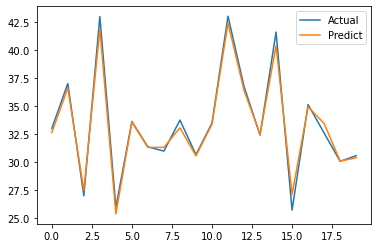

In [55]:
graph.plot(kind='line')

# Accuracy of L1 Regression

In [54]:
accuracy=lasso.score(x_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.2f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 99.03 %
